# Ciencia de datos
## Práctica 10. Clasificación de datos con sklearn
###  Alberto Benavides

Primero se recuperan las características para las CIEs que contienen la pendiente, ordenada en el origen y las 52 autocorrelaciones correspondientes a retrasos de 1 a 52 semanas por serie de tiempo. Estos valores provienen de prácticas anteriores.

In [120]:
import pandas as pd

df = pd.read_csv("C:/Users/bena8/Documents/FIME/Tesis/Resultados/features.csv")
df.sample(3)

,m,b,ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,...,ac44,ac45,ac46,ac47,ac48,ac49,ac50,ac51,ac52,cie
26,-2.654424e-10,3.204952e-07,0.110847,0.069672,0.107836,0.080559,0.128797,-0.027006,0.042914,-0.009807,...,0.029668,0.076565,0.089312,0.024519,0.008848,0.059614,0.099755,0.046717,-0.020862,g00-g03
8,3.893878e-11,4.432440e-08,0.393243,0.260146,0.044702,0.032172,0.012605,0.025166,0.014480,0.009281,...,-0.017366,0.067969,0.005142,0.003701,-0.020010,0.007456,0.042142,0.077540,0.090818,a27
33,-5.001284e-08,8.796233e-05,0.881185,0.793629,0.694008,0.596382,0.456681,0.319222,0.189304,0.062305,...,0.314212,0.388623,0.451051,0.497185,0.527848,0.531338,0.510950,0.475725,0.426713,t63.2


Y de estas características, se eligen las 2 principales provenientes del análisis de componentes principales para hacer las clasificaciones

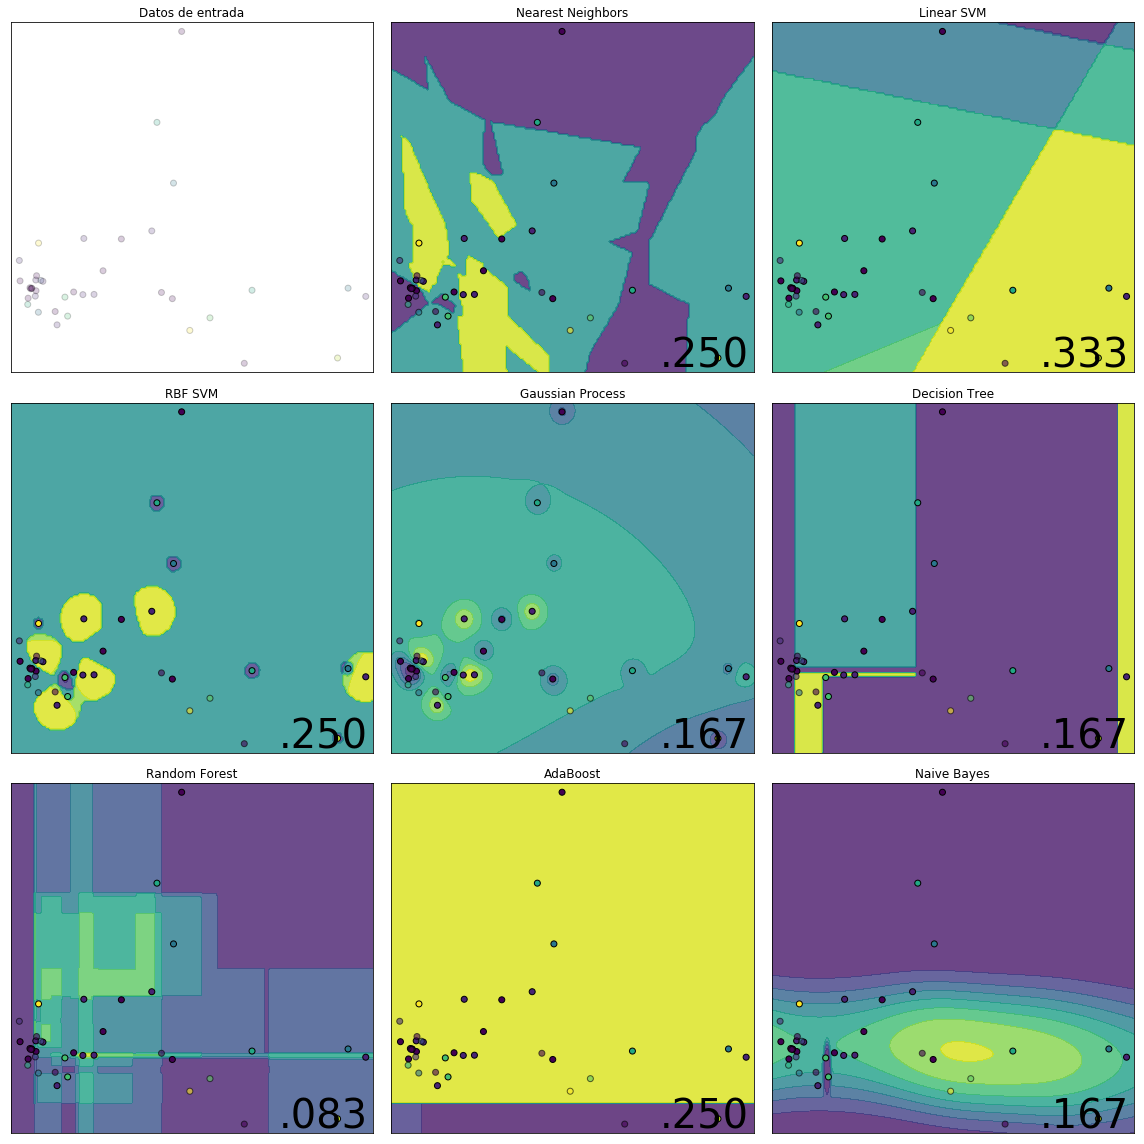

In [114]:
from math import ceil, sqrt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy import isnan, nan, arange, meshgrid, c_, unique
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.cm as cm

x = df.iloc[:, :-1]
y = df.iloc[:, -1]
y_copy = y
x_copy = x

y = y.astype(str).str[0] 


classnames, y = unique(y, return_inverse=True)

x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2) # pedimos uno bidimensional
X = pca.fit_transform(x)
# código de https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
k = int(ceil(sqrt(len(classifiers) + 1)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) # división
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = meshgrid(arange(x_min, x_max, 0.1), arange(y_min, y_max, 0.1))
plt.rcParams["figure.figsize"] = [16, 16]
figure = plt.figure()
ax = plt.subplot(k, k, 1)
ax.set_title("Datos de entrada")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm.viridis, alpha=0.2, edgecolors='k') # entrenamiento
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm.viridis, alpha=0.2, edgecolors='k') # validación
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i = 2
for name, clf in zip(names, classifiers):
    ax = plt.subplot(k, k, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = clf.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm.viridis, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm.viridis, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm.viridis, edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'), size=40, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

In [115]:
from sklearn import metrics
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) # la misma división
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    print(name, clf.score(X_test, y_test))
    expected, predicted = y_test, clf.predict(X_test)
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    print('-' * 60)

Nearest Neighbors 0.25
             precision    recall  f1-score   support

          0       0.33      0.60      0.43         5
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         1
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         1

avg / total       0.14      0.25      0.18        12

[[3 1 0 0 0 0 1 0]
 [2 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]
------------------------------------------------------------
Linear SVM 0.3333333333333333
             precision    recall  f1-score   support

          0       0.44      0.80      0.57         5
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.

C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Gaussian Process 0.16666666666666666
             precision    recall  f1-score   support

          0       0.25      0.40      0.31         5
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         1
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         0

avg / total       0.10      0.17      0.13        12

[[2 2 0 0 0 0 0 1]
 [2 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
------------------------------------------------------------
Decision Tree 0.08333333333333333
             precision    recall  f1-score   support

          0       0.25      0.20      0.22         5
          1       0.00      0.00      0.00         2
          2       0.00

C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defi

Es muy baja la certeza por clasificar las enfermedades con los dos componentes obtenidos por PCA. Existen otros métodos como el del umbral de varianza (VT por sus siglas en inglés). Primero se escalan con base en una escala que no iguale la varianza de los datos

In [116]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit(x_copy).transform(x_copy)

para posteriormente seleccionar las características que tengan varianzas que pasen el umbral dado

In [117]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
th = .9 * (1 - .9)
print("Umbral de varianza = {}".format(th))
sel = VarianceThreshold(threshold = th)

sel.fit_transform( x )

xVT = x_copy[x_copy.columns[sel.get_support(indices=True)]]

xVT

Umbral de varianza = 0.08999999999999998


,ac1,ac2,ac3,ac4,ac48
0,0.393749,0.122484,0.010328,0.026661,-0.017822
1,0.831565,0.690654,0.594390,0.516446,-0.016753
2,0.667701,0.505751,0.436771,0.352219,0.179380
3,0.620012,0.595386,0.535631,0.462663,0.284554
4,0.605797,0.479571,0.410353,0.367218,0.191535
5,0.380632,0.195406,0.107774,0.091505,0.126218
6,0.085993,0.048897,0.064574,0.118768,0.015544
7,0.522652,0.363609,0.361372,0.385651,0.235813
8,0.393243,0.260146,0.044702,0.032172,-0.020010
9,-0.007522,-0.007561,-0.007600,-0.007639,-0.000644


Ahora ya podrían analizarse tras escalarse con la escala estándar

In [118]:
X = StandardScaler().fit_transform(xVT)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) # la misma división
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    print(name, clf.score(X_test, y_test))
    expected, predicted = y_test, clf.predict(X_test)
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    print('-' * 60)

Nearest Neighbors 0.4166666666666667
             precision    recall  f1-score   support

          0       0.57      0.80      0.67         5
          1       0.33      0.50      0.40         2
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.29      0.42      0.34        12

[[4 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]]
------------------------------------------------------------
Linear SVM 0.4166666666666667
             precision    recall  f1-score   support

          0       0.42      1.00      0.59         5
          1       0.00      0.00      0.00         2
          2       0.00    

C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defi

Aunque no logran clasificar decentemente, algunos algoritmos mejoran un poco, por lo que se intentará clasificar nuevamente pero escalando con el algoritmo MinMax

In [119]:
X = MinMaxScaler().fit(xVT).transform(xVT)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) # la misma división
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    print(name, clf.score(X_test, y_test))
    expected, predicted = y_test, clf.predict(X_test)
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    print('-' * 60)

Nearest Neighbors 0.4166666666666667
             precision    recall  f1-score   support

          0       0.57      0.80      0.67         5
          1       0.33      0.50      0.40         2
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.29      0.42      0.34        12

[[4 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]]
------------------------------------------------------------
Linear SVM 0.4166666666666667
             precision    recall  f1-score   support

          0       0.42      1.00      0.59         5
          1       0.00      0.00      0.00         2
          2       0.00    

C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bena8\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defi

El RandomForest mejora mientras el AdaBoost empeora y los demás se quedan igual, así que la escala estándar sería preferente para AdaBoost mientras que la MinMax con rango $[-1, 1]$ es mejor para RandomForest.